<a href="https://colab.research.google.com/github/shrikant280304/FMML_PROJECTS_AND_LABS/blob/main/M9_L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 1: Introduction to Multi-Layer Perceptron (MLP)
#### Module Coordinator: Shantanu Agrawal




# Exercise

Recall the single layer perceptron you had seen earlier. Remember when you were trying to find decision boundaries for AND, OR, NAND, NOR, XOR? For which of these could the SLP succesfully classify? Can you notice anything about the data in this case?

Look for *Module 4* notebooks for the revison to these texts.

Let us revise SLP briefly.



# Single Layer Perceptron


A perceptron or a neuron is a mathematical function that takes in input a vector and outputs a single numerical value.

The neuron is defined as follows:
$$
y = f \left( \sum_i (x_i w_i + b) \right)
$$



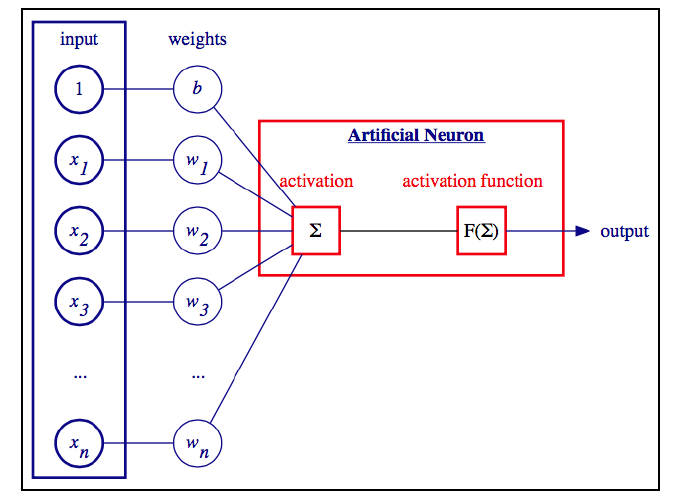

# Linearly separable data

If you recall, the perceptron was able to classify for the rest of the logic gates, but not XOR. What exactly makes XOR a problem that the perceptron is unable to tackle?
Hint: Try plotting the XOR function on a graph.

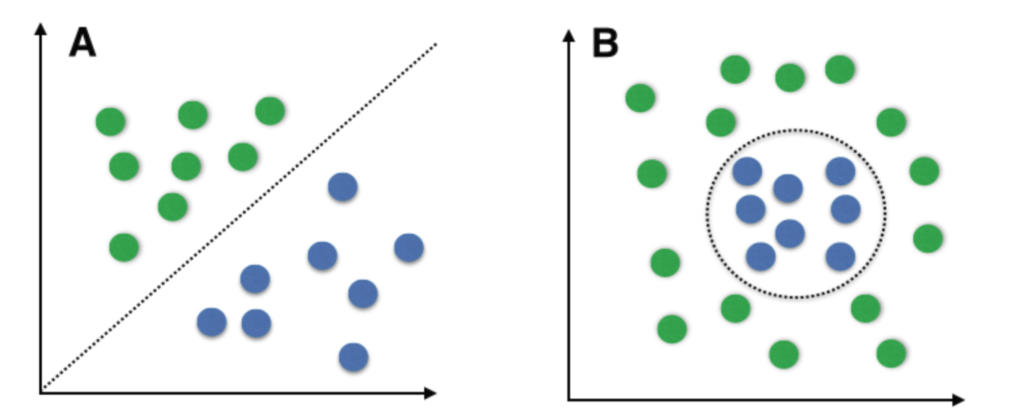

The answer relates to *linear separability* of the data.

# Limitations of linear models

Linear models may tend to go wrong at times and may not be good for the dataset we are dealing with. For example, they tend to encode a simple weaker assumption of *monotonicity*, ie, that increase in our feature must either always cause an increase in our model’s output (if the corresponding weight is positive), or always cause a decrease in our model’s output (if the corresponding weight is negative).
This assumption may not be good assumption at all times, and hence there is an inherent limitation in the power of these models to capture more complex relationships.

Our SLP, for example, cannot classify properly when we do not have linear separability of data.

# Introducing MLPs

We will now use several of the SLP neurons in a layer and stack several layers to create a multi-layered neural network. We see how this network is able to create a decision boundary for XOR, which our SLP could not.

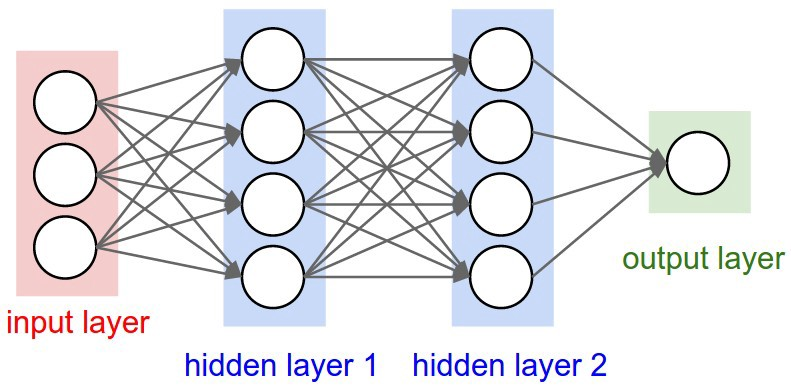

# Hidden Layers

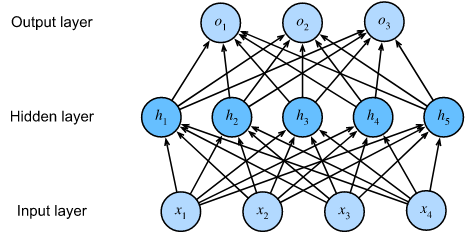

A more general class of functions than linear models can be handled by incorporating one or more hidden layers. We can do this by stacking many fully-connected layers on top of each other. Each layer feeds into the layer above it, until we generate outputs.

One way to think of this architecture is to think of it as the first $L - 1$ layers as creating a transformed representation of the data and the final layer as a linear predictor on this transformed representation.

# Stacking layers without non-linearities

Consider the diagram above.

By the matrix $\mathbf{X} \in \mathbb{R}^{n \times d}$, we denote a minibatch of n examples where each example has d inputs (features). For a one-hidden-layer MLP whose hidden layer has h hidden units, denote by $\mathbf{H} \in \mathbb{R}^{n \times h}$ the outputs of the hidden layer, which are hidden representations. Since the hidden and output layers are both fully connected, we have hidden-layer weights $\mathbf{W}^{(1)} \in \mathbb{R}^{d \times h}$ and biases $\mathbf{b}^{(1)} \in \mathbb{R}^{1 \times h}$ and output-layer weights $\mathbf{W}^{(2)} \in \mathbb{R}^{h \times q}$ and biases $\mathbf{b}^{(2)} \in \mathbb{R}^{1 \times q}$. Formally, we calculate the outputs $\mathbf{O} \in \mathbb{R}^{n \times q}$ of the one-hidden-layer MLP as follows:
\begin{split}\begin{aligned}
    \mathbf{H} & = \mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}, \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.
\end{aligned}\end{split}

Note that after adding the hidden layer, our model now requires us to track and update additional sets of parameters. What advantage has this given us?

It might surprise you to find that there isn't really any advantage in terms of the expressiblity: our model is still ultimately linear.


We can view the equivalence formally by proving that for any values of the weights, we can just collapse out the hidden layer, yielding an equivalent single-layer model with parameters $\mathbf{W} = \mathbf{W}^{(1)}\mathbf{W}^{(2)}$ and $\mathbf{b} = \mathbf{b}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)}$:
$
\mathbf{O} = (\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})\mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W}^{(1)}\mathbf{W}^{(2)} + \mathbf{b}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W} + \mathbf{b}.
$


# Introducing non-linearities

In order to realize the full potential of MLP, we need a key ingredient: a nonlinear activation function $\sigma$ to be applied to each hidden unit following the affine transformation. The outputs of activation functions (e.g., $\sigma(\cdot)$) are called activations. In general, with activation functions in place, it is no longer possible to collapse our MLP into a linear model:

$
\begin{split}\begin{aligned}
    \mathbf{H} & = \sigma(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}), \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.\\
\end{aligned}\end{split}
$

Since each row in $\mathbf{X}$ corresponds to an example, with some abuse of notation, we define the nonlinearity $\sigma$ to apply to its inputs in a rowwise fashion, i.e., one example at a time.  

Often, the activation functions that we apply to hidden layers are not merely rowwise, but elementwise. That means that after computing the linear portion of the layer, we can calculate each activation without looking at the values taken by the other hidden units. This is true for most activation functions we look at

To build more general MLPs, we can continue stacking such hidden layers, e.g., $ \mathbf{H}^{(1)} = \sigma_1(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})$ and $\mathbf{H}^{(2)} = \sigma_2(\mathbf{H}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)})$, one atop another, yielding ever more expressive models.

# Activation functions

Let us take a look at a few of the activation functions we can use with MLPs.

## ReLU

$ \operatorname{ReLU}(x) = \max(x, 0) $

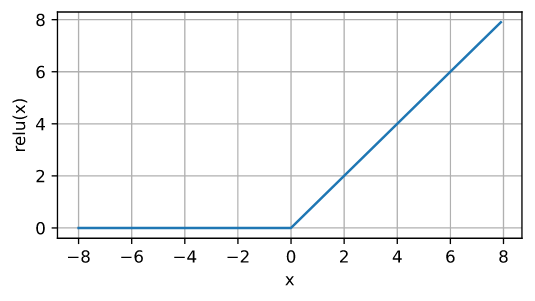

## Sigmoid

$ \operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)} $

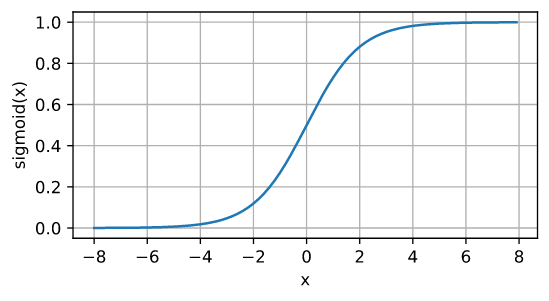

## tanh

$ \operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)} $

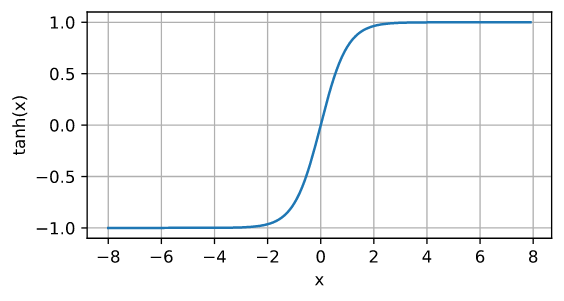

# Example MLP implementation in PyTorch

We now implement an MLP using pytorch and see how it can successfully find a decision boundary for the XOR problem, that our SLP could not solve earlier.

# Required imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

%matplotlib inline

# # The following code is used for hiding the warnings and make this notebook clearer.
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

# Plotting code

In [2]:
## Code to plot decision boundary ##

def plot_decision_regions(X, y, classifier, method, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    if method == 'numpy':
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    elif method == 'pytorch':
        inp = torch.tensor([xx1.ravel(), xx2.ravel()], dtype=torch.float, requires_grad=False).T
        Z = np.array([]).reshape(0,1)
        for data in inp:
            out = classifier(data)
            Z = np.vstack((Z, out.data.numpy()))
    else:
        print('Not implemented')
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

# Define the input data

In [3]:
torch.manual_seed(0)

X = torch.tensor([[0,0],[0,1], [1,0], [1,1]], dtype=torch.float, requires_grad=False)
Y = torch.tensor([0,1,1,0], dtype=torch.float, requires_grad=False)


Define the Neural Network class `Net`

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Initialize all the layers with learnable parameters
        self.fc1 = nn.Linear(2, 2, bias=True)
        self.fc2 = nn.Linear(2, 1, bias=True)

    def forward(self, x):
        # Write the forward pass
        # Note that we use a sigmoid activation function here
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        x = torch.sigmoid(x)
        return x

model = Net()

# Initialize the weights

In [5]:
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)

weights_init(model)


# Define the loss function

In [6]:
# Use a mean square error loss
loss_func = nn.MSELoss()

# Define optimizer

In [7]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Write the training routine

In [8]:
epochs = 5000
steps = X.size(0)
for i in range(epochs): # iterate over epoch
    for j in range(steps): # iterate over sample
        # randomly sample the inputs
        sample = np.random.randint(X.size(0))
        x_var = X[sample]
        y_var = Y[sample]

        optimizer.zero_grad()

        y_hat = model(x_var)

        loss = loss_func.forward(y_hat[0], y_var)


        # BACKPROP! You will see more details about this next week!
        loss.backward()

        optimizer.step()

    if i % 500 == 0:
        print("Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))

Epoch: 0, Loss: 0.23569709062576294, 
Epoch: 500, Loss: 0.32934626936912537, 
Epoch: 1000, Loss: 0.304279625415802, 
Epoch: 1500, Loss: 0.2447098195552826, 
Epoch: 2000, Loss: 0.2841360867023468, 
Epoch: 2500, Loss: 0.30453529953956604, 
Epoch: 3000, Loss: 0.32197925448417664, 
Epoch: 3500, Loss: 0.2018088698387146, 
Epoch: 4000, Loss: 0.22160980105400085, 
Epoch: 4500, Loss: 0.2538442015647888, 


# Check the output

In [9]:
for data in X:
    output = model(data)
    print(data, np.round(output.data.numpy()))

tensor([0., 0.]) [1.]
tensor([0., 1.]) [1.]
tensor([1., 0.]) [1.]
tensor([1., 1.]) [1.]


# Visualize the decision boundary

<ipython-input-2-d74ee9bebb86>:18: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  inp = torch.tensor([xx1.ravel(), xx2.ravel()], dtype=torch.float, requires_grad=False).T
<ipython-input-2-d74ee9bebb86>:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


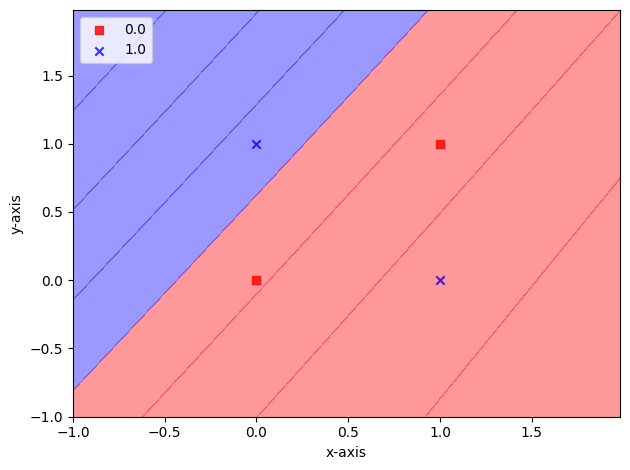

In [10]:
np.random.seed(0)
plot_decision_regions(X.detach().numpy(), Y.detach().numpy(), model, 'pytorch')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Exercises

**Q1.**  **Try using the MLP classifier for different logic gates other than XOR like AND, OR, NOR etc.**

**AND GATE**

In [11]:
# AND Gate
X = torch.tensor([[0,0], [0,1], [1,0], [1,1]], dtype=torch.float, requires_grad=False)
Y = torch.tensor([0,0,0,1], dtype=torch.float, requires_grad=False)

In [12]:
# Use a mean square error loss
loss_func = nn.MSELoss()

In [13]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [14]:
epochs = 5000
steps = X.size(0)
for i in range(epochs): # iterate over epoch
    for j in range(steps): # iterate over sample
        # randomly sample the inputs
        sample = np.random.randint(X.size(0))
        x_var = X[sample]
        y_var = Y[sample]

        optimizer.zero_grad()

        y_hat = model(x_var)

        loss = loss_func.forward(y_hat[0], y_var)


        # BACKPROP! You will see more details about this next week!
        loss.backward()

        optimizer.step()

    if i % 500 == 0:
        print("Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))

Epoch: 0, Loss: 0.31535837054252625, 
Epoch: 500, Loss: 0.04728246480226517, 
Epoch: 1000, Loss: 0.06527544558048248, 
Epoch: 1500, Loss: 0.007142120972275734, 
Epoch: 2000, Loss: 0.0037080743350088596, 
Epoch: 2500, Loss: 0.0026417081244289875, 
Epoch: 3000, Loss: 0.0017265278147533536, 
Epoch: 3500, Loss: 3.458615992713021e-06, 
Epoch: 4000, Loss: 0.0009551956318318844, 
Epoch: 4500, Loss: 2.136487410098198e-06, 


In [15]:
for data in X:
    output = model(data)
    print(data, np.round(output.data.numpy()))

tensor([0., 0.]) [0.]
tensor([0., 1.]) [0.]
tensor([1., 0.]) [0.]
tensor([1., 1.]) [1.]


<ipython-input-2-d74ee9bebb86>:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


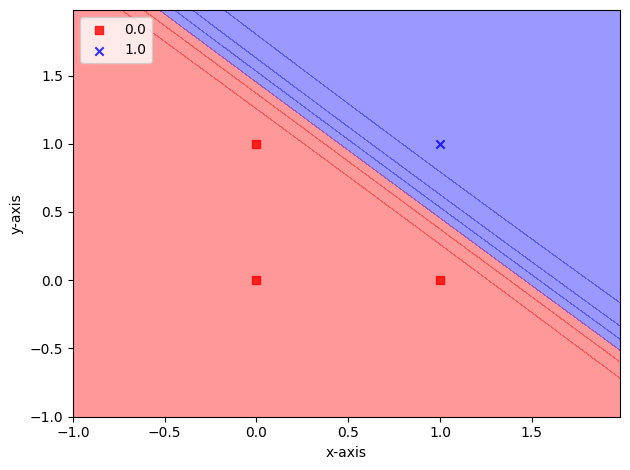

In [16]:
np.random.seed(0)
plot_decision_regions(X.detach().numpy(), Y.detach().numpy(), model, 'pytorch')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**OR GATE**

In [17]:
X = torch.tensor([[0,0], [0,1], [1,0], [1,1]], dtype=torch.float, requires_grad=False)
Y = torch.tensor([0,1,1,1], dtype=torch.float, requires_grad=False)

In [18]:
# Use a mean square error loss
loss_func = nn.MSELoss()

In [19]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [20]:
epochs = 5000
steps = X.size(0)
for i in range(epochs): # iterate over epoch
    for j in range(steps): # iterate over sample
        # randomly sample the inputs
        sample = np.random.randint(X.size(0))
        x_var = X[sample]
        y_var = Y[sample]

        optimizer.zero_grad()

        y_hat = model(x_var)

        loss = loss_func.forward(y_hat[0], y_var)


        # BACKPROP! You will see more details about this next week!
        loss.backward()

        optimizer.step()

    if i % 500 == 0:
        print("Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))

Epoch: 0, Loss: 1.8383630049356725e-06, 
Epoch: 500, Loss: 0.00020710741227958351, 
Epoch: 1000, Loss: 1.5060198848004802e-06, 
Epoch: 1500, Loss: 0.0001923306263051927, 
Epoch: 2000, Loss: 0.0001589494349900633, 
Epoch: 2500, Loss: 0.0001508756831753999, 
Epoch: 3000, Loss: 0.0001245699095306918, 
Epoch: 3500, Loss: 0.0002865097194444388, 
Epoch: 4000, Loss: 0.00011308333341730759, 
Epoch: 4500, Loss: 0.00027322882669977844, 


In [21]:
for data in X:
    output = model(data)
    print(data, np.round(output.data.numpy()))

tensor([0., 0.]) [0.]
tensor([0., 1.]) [1.]
tensor([1., 0.]) [1.]
tensor([1., 1.]) [1.]


<ipython-input-2-d74ee9bebb86>:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


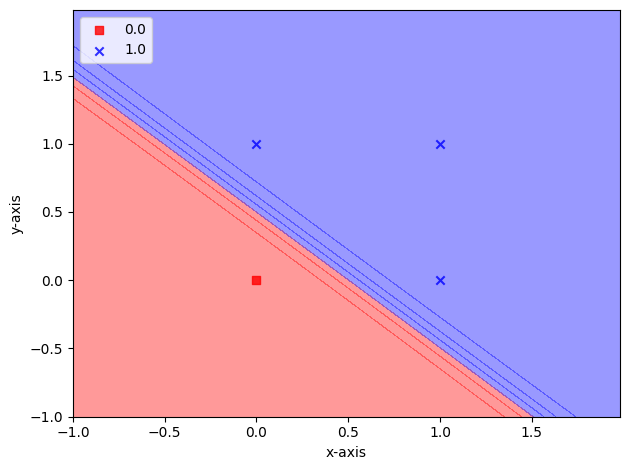

In [22]:
np.random.seed(0)
plot_decision_regions(X.detach().numpy(), Y.detach().numpy(), model, 'pytorch')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**NOR GATE**

In [23]:
X = torch.tensor([[0,0], [0,1], [1,0], [1,1]], dtype=torch.float, requires_grad=False)
Y = torch.tensor([1,0,0,0], dtype=torch.float, requires_grad=False)

In [24]:
# Use a mean square error loss
loss_func = nn.MSELoss()

In [25]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [26]:
epochs = 5000
steps = X.size(0)
for i in range(epochs): # iterate over epoch
    for j in range(steps): # iterate over sample
        # randomly sample the inputs
        sample = np.random.randint(X.size(0))
        x_var = X[sample]
        y_var = Y[sample]

        optimizer.zero_grad()

        y_hat = model(x_var)

        loss = loss_func.forward(y_hat[0], y_var)


        # BACKPROP! You will see more details about this next week!
        loss.backward()

        optimizer.step()

    if i % 500 == 0:
        print("Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))

Epoch: 0, Loss: 0.967801570892334, 
Epoch: 500, Loss: 0.9990009069442749, 
Epoch: 1000, Loss: 0.0002998508280143142, 
Epoch: 1500, Loss: 9.959522913050023e-07, 
Epoch: 2000, Loss: 1.0991285535055795e-06, 
Epoch: 2500, Loss: 1.3816173805025755e-06, 
Epoch: 3000, Loss: 1.4413895996767678e-06, 
Epoch: 3500, Loss: 0.9984461069107056, 
Epoch: 4000, Loss: 2.3647430680284742e-06, 
Epoch: 4500, Loss: 0.9979548454284668, 


In [27]:
for data in X:
    output = model(data)
    print(data, np.round(output.data.numpy()))

tensor([0., 0.]) [0.]
tensor([0., 1.]) [0.]
tensor([1., 0.]) [0.]
tensor([1., 1.]) [0.]


<ipython-input-2-d74ee9bebb86>:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


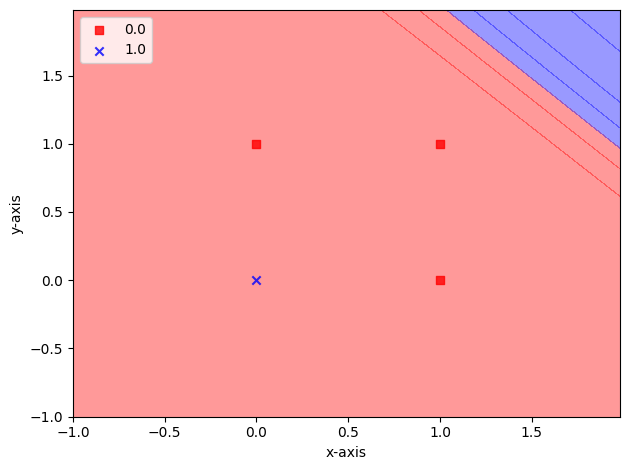

In [28]:
np.random.seed(0)
plot_decision_regions(X.detach().numpy(), Y.detach().numpy(), model, 'pytorch')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**XNOR**

In [29]:
X = torch.tensor([[0,0], [0,1], [1,0], [1,1]], dtype=torch.float, requires_grad=False)
Y = torch.tensor([1, 0, 0, 1], dtype=torch.float, requires_grad=False)

In [30]:
# Use a mean square error loss
loss_func = nn.BCELoss()

In [31]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [32]:
# Training loop
epochs = 5000
for i in range(epochs):
    optimizer.zero_grad()
    y_hat = model(X).squeeze()  # Forward pass
    loss = loss_func(y_hat, Y)  # Compute loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    if i % 500 == 0:
        print(f"Epoch {i}, Loss: {loss.item()}")

Epoch 0, Loss: 2.735311985015869
Epoch 500, Loss: 0.5856021642684937
Epoch 1000, Loss: 0.5636330842971802
Epoch 1500, Loss: 0.5473834872245789
Epoch 2000, Loss: 0.535280704498291
Epoch 2500, Loss: 0.5261220335960388
Epoch 3000, Loss: 0.5190743803977966
Epoch 3500, Loss: 0.5135645270347595
Epoch 4000, Loss: 0.5091898441314697
Epoch 4500, Loss: 0.5056635141372681


In [33]:
for data in X:
    output = model(data)
    print(data, np.round(output.item()))

tensor([0., 0.]) 0.0
tensor([0., 1.]) 0.0
tensor([1., 0.]) 0.0
tensor([1., 1.]) 1.0


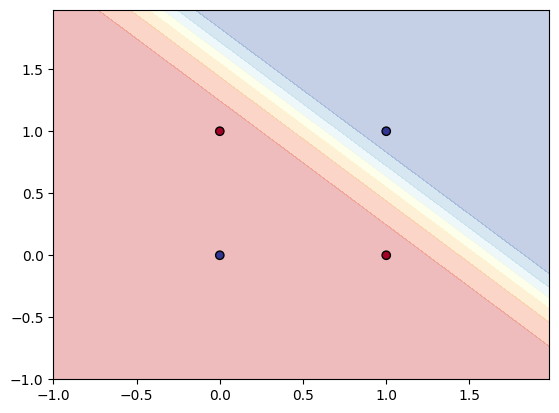

In [34]:
def plot_decision_regions(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x_min, x_max, 0.02),
                           np.arange(y_min, y_max, 0.02))

    inp = torch.tensor(np.c_[xx1.ravel(), xx2.ravel()], dtype=torch.float)
    Z = model(inp).detach().numpy().reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
    plt.show()

plot_decision_regions(X.numpy(), Y.numpy(), model)

**Q2) Try to change 0/1 logic to -1/+1 logic. What happens with an SLP in this case? What about an MLP?**

Epoch 0, Loss: 1.7789250612258911
Epoch 500, Loss: 0.0013930066488683224
Epoch 1000, Loss: 0.0006254212930798531
Epoch 1500, Loss: 0.00039677941822446883
Epoch 2000, Loss: 0.0002885131980292499
Epoch 2500, Loss: 0.00022576401534024626
Epoch 3000, Loss: 0.0001849626423791051
Epoch 3500, Loss: 0.00015637290198355913
Epoch 4000, Loss: 0.0001352613908238709
Epoch 4500, Loss: 0.00011905284191016108
tensor([-1., -1.]) -1.0
tensor([-1.,  1.]) -1.0
tensor([ 1., -1.]) -1.0
tensor([1., 1.]) 1.0


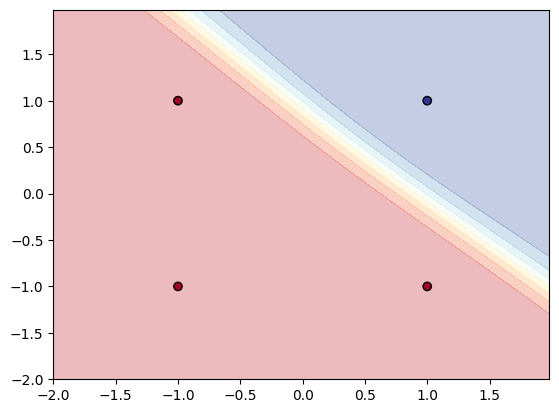

In [35]:
# AND Gate with -1/+1 logic (Inputs and Outputs)
X = torch.tensor([[-1, -1], [-1, 1], [1, -1], [1, 1]], dtype=torch.float, requires_grad=False)
Y = torch.tensor([-1, -1, -1, 1], dtype=torch.float, requires_grad=False)

# Define the neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 4)  # More neurons for non-linearity
        self.fc2 = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))  # Use Tanh activation for -1 to 1 range
        x = torch.tanh(self.fc2(x))  # Keep outputs in -1 to 1 range
        return x

# Initialize model, loss, and optimizer
model = Net()
loss_func = nn.MSELoss()  # MSE works since output is in (-1,1)
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 5000
for i in range(epochs):
    optimizer.zero_grad()
    y_hat = model(X).squeeze()  # Forward pass
    loss = loss_func(y_hat, Y)  # Compute loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    if i % 500 == 0:
        print(f"Epoch {i}, Loss: {loss.item()}")

# Testing the model
for data in X:
    output = model(data)
    print(data, np.round(output.item()))
# Plot decision boundary
def plot_decision_regions(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x_min, x_max, 0.02),
                           np.arange(y_min, y_max, 0.02))

    inp = torch.tensor(np.c_[xx1.ravel(), xx2.ravel()], dtype=torch.float)
    Z = model(inp).detach().numpy().reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
    plt.show()

plot_decision_regions(X.numpy(), Y.numpy(), model)


Epoch 0, Loss: 0.8499912023544312
Epoch 500, Loss: 0.0010338202118873596
Epoch 1000, Loss: 0.0004588237206917256
Epoch 1500, Loss: 0.0002887330192606896
Epoch 2000, Loss: 0.00020874525944236666
Epoch 2500, Loss: 0.0001626464509172365
Epoch 3000, Loss: 0.000132807603222318
Epoch 3500, Loss: 0.00011197900312254205
Epoch 4000, Loss: 9.664776735007763e-05
Epoch 4500, Loss: 8.490939217153937e-05
tensor([-1., -1.]) -1.0
tensor([-1.,  1.]) 1.0
tensor([ 1., -1.]) 1.0
tensor([1., 1.]) 1.0


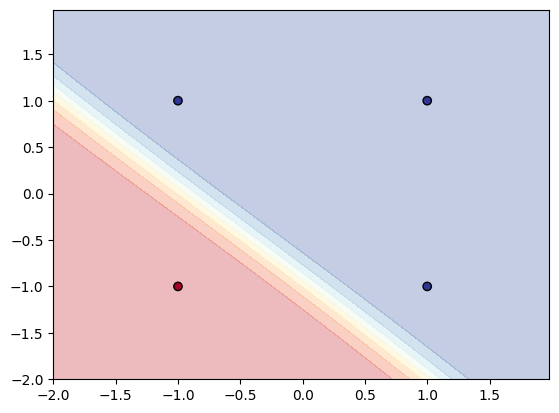

In [36]:
# OR Gate
X = torch.tensor([[-1, -1], [-1, 1], [1, -1], [1, 1]], dtype=torch.float, requires_grad=False)
Y = torch.tensor([-1, 1, 1, 1], dtype=torch.float, requires_grad=False)

# Define the neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 4)  # More neurons for non-linearity
        self.fc2 = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))  # Use Tanh activation for -1 to 1 range
        x = torch.tanh(self.fc2(x))  # Keep outputs in -1 to 1 range
        return x

# Initialize model, loss, and optimizer
model = Net()
loss_func = nn.MSELoss()  # MSE works since output is in (-1,1)
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 5000
for i in range(epochs):
    optimizer.zero_grad()
    y_hat = model(X).squeeze()  # Forward pass
    loss = loss_func(y_hat, Y)  # Compute loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    if i % 500 == 0:
        print(f"Epoch {i}, Loss: {loss.item()}")

# Testing the model
for data in X:
    output = model(data)
    print(data, np.round(output.item()))
# Plot decision boundary
def plot_decision_regions(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x_min, x_max, 0.02),
                           np.arange(y_min, y_max, 0.02))

    inp = torch.tensor(np.c_[xx1.ravel(), xx2.ravel()], dtype=torch.float)
    Z = model(inp).detach().numpy().reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
    plt.show()

plot_decision_regions(X.numpy(), Y.numpy(), model)


Epoch 0, Loss: 0.8970955610275269
Epoch 500, Loss: 0.0011215811828151345
Epoch 1000, Loss: 0.000494759704452008
Epoch 1500, Loss: 0.0003113435523118824
Epoch 2000, Loss: 0.0002253030688734725
Epoch 2500, Loss: 0.00017574074445292354
Epoch 3000, Loss: 0.00014365474635269493
Epoch 3500, Loss: 0.00012124791828682646
Epoch 4000, Loss: 0.00010474543523741886
Epoch 4500, Loss: 9.210278221871704e-05
tensor([-1., -1.]) 1.0
tensor([-1.,  1.]) -1.0
tensor([ 1., -1.]) -1.0
tensor([1., 1.]) -1.0


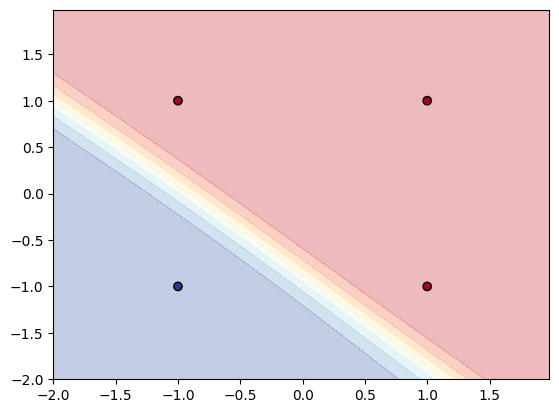

In [37]:
# NOR Gate
X = torch.tensor([[-1, -1], [-1, 1], [1, -1], [1, 1]], dtype=torch.float, requires_grad=False)
Y = torch.tensor([1, -1, -1, -1], dtype=torch.float, requires_grad=False)

# Define the neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 4)  # More neurons for non-linearity
        self.fc2 = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))  # Use Tanh activation for -1 to 1 range
        x = torch.tanh(self.fc2(x))  # Keep outputs in -1 to 1 range
        return x

# Initialize model, loss, and optimizer
model = Net()
loss_func = nn.MSELoss()  # MSE works since output is in (-1,1)
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 5000
for i in range(epochs):
    optimizer.zero_grad()
    y_hat = model(X).squeeze()  # Forward pass
    loss = loss_func(y_hat, Y)  # Compute loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    if i % 500 == 0:
        print(f"Epoch {i}, Loss: {loss.item()}")

# Testing the model
for data in X:
    output = model(data)
    print(data, np.round(output.item()))

# Plot decision boundary
def plot_decision_regions(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x_min, x_max, 0.02),
                           np.arange(y_min, y_max, 0.02))

    inp = torch.tensor(np.c_[xx1.ravel(), xx2.ravel()], dtype=torch.float)
    Z = model(inp).detach().numpy().reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
    plt.show()

plot_decision_regions(X.numpy(), Y.numpy(), model)


Epoch 0, Loss: 1.004928708076477
Epoch 500, Loss: 0.0027117817662656307
Epoch 1000, Loss: 0.0011670875828713179
Epoch 1500, Loss: 0.0007278565899468958
Epoch 2000, Loss: 0.000524228613357991
Epoch 2500, Loss: 0.0004077224584762007
Epoch 3000, Loss: 0.00033263256773352623
Epoch 3500, Loss: 0.0002803616807796061
Epoch 4000, Loss: 0.00024195715377572924
Epoch 4500, Loss: 0.00021259061759337783
tensor([-1., -1.]) 1.0
tensor([-1.,  1.]) -1.0
tensor([ 1., -1.]) -1.0
tensor([1., 1.]) 1.0


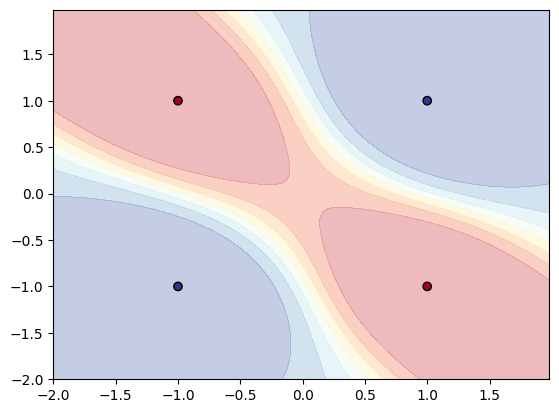

In [38]:
# XNOR Gate
X = torch.tensor([[-1, -1], [-1, 1], [1, -1], [1, 1]], dtype=torch.float, requires_grad=False)
Y = torch.tensor([1, -1, -1, 1], dtype=torch.float, requires_grad=False)

# Define the neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 4)  # More neurons for non-linearity
        self.fc2 = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))  # Use Tanh activation for -1 to 1 range
        x = torch.tanh(self.fc2(x))  # Keep outputs in -1 to 1 range
        return x

# Initialize model, loss, and optimizer
model = Net()
loss_func = nn.MSELoss()  # MSE works since output is in (-1,1)
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 5000
for i in range(epochs):
    optimizer.zero_grad()
    y_hat = model(X).squeeze()  # Forward pass
    loss = loss_func(y_hat, Y)  # Compute loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    if i % 500 == 0:
        print(f"Epoch {i}, Loss: {loss.item()}")

# Testing the model
for data in X:
    output = model(data)
    print(data, np.round(output.item()))

# Plot decision boundary
def plot_decision_regions(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x_min, x_max, 0.02),
                           np.arange(y_min, y_max, 0.02))

    inp = torch.tensor(np.c_[xx1.ravel(), xx2.ravel()], dtype=torch.float)
    Z = model(inp).detach().numpy().reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
    plt.show()

plot_decision_regions(X.numpy(), Y.numpy(), model)

- SLP can classify AND, OR, NOR because they are linearly separable. A single straight line can separate the classes.
- SLP fails because XNOR is not linearly separable. It cannot find a single straight line to separate the classes.
- MLP is successful because the hidden layer introduces non-linearity, that allows the model to learn a complex decision boundary that can classify XNOR.

**Q3) Try removing the activation function from the MLP and rerun the code. What happens in this case?**

Epoch 0, Loss: 1.0552034378051758
Epoch 500, Loss: 0.2499999850988388
Epoch 1000, Loss: 0.2499999850988388
Epoch 1500, Loss: 0.2499999850988388
Epoch 2000, Loss: 0.2499999850988388
Epoch 2500, Loss: 0.2499999850988388
Epoch 3000, Loss: 0.2499999850988388
Epoch 3500, Loss: 0.2499999850988388
Epoch 4000, Loss: 0.2499999850988388
Epoch 4500, Loss: 0.2499999850988388
tensor([-1., -1.]) -2.0
tensor([-1.,  1.]) -0.0
tensor([ 1., -1.]) -1.0
tensor([1., 1.]) 0.0


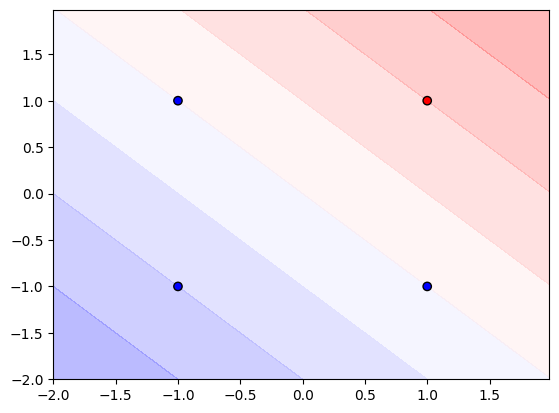

In [39]:
# AND Gate
X = torch.tensor([[-1, -1], [-1, 1], [1, -1], [1, 1]], dtype=torch.float, requires_grad=False)
Y = torch.tensor([-1, -1, -1, 1], dtype=torch.float, requires_grad=False)

# Define the neural network without activation functions
class NetNoActivation(nn.Module):
    def __init__(self):
        super(NetNoActivation, self).__init__()
        self.fc1 = nn.Linear(2, 4)  # More neurons for non-linearity (but no activation used)
        self.fc2 = nn.Linear(4, 1)

    def forward(self, x):
        x = self.fc1(x)  # No activation function
        x = self.fc2(x)  # No activation function
        return x

# Initialize model, loss, and optimizer
model = NetNoActivation()
loss_func = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 5000
for i in range(epochs):
    optimizer.zero_grad()
    y_hat = model(X).squeeze()  # Forward pass
    loss = loss_func(y_hat, Y)  # Compute loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    if i % 500 == 0:
        print(f"Epoch {i}, Loss: {loss.item()}")

# Testing the model
for data in X:
    output = model(data)
    print(data, np.round(output.item()))

# Plot decision boundary
def plot_decision_regions(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x_min, x_max, 0.02),
                           np.arange(y_min, y_max, 0.02))

    inp = torch.tensor(np.c_[xx1.ravel(), xx2.ravel()], dtype=torch.float)
    Z = model(inp).detach().numpy().reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap="bwr")  # Only two colors
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolor='k')  # Same colormap for points
    plt.show()
plot_decision_regions(X.numpy(), Y.numpy(), model)

Epoch 0, Loss: 1.1162431240081787
Epoch 500, Loss: 1.0
Epoch 1000, Loss: 1.0
Epoch 1500, Loss: 1.0
Epoch 2000, Loss: 1.0
Epoch 2500, Loss: 1.0
Epoch 3000, Loss: 1.0
Epoch 3500, Loss: 1.0
Epoch 4000, Loss: 1.0
Epoch 4500, Loss: 1.0
tensor([-1., -1.]) -0.0
tensor([-1.,  1.]) -0.0
tensor([ 1., -1.]) 0.0
tensor([1., 1.]) 0.0


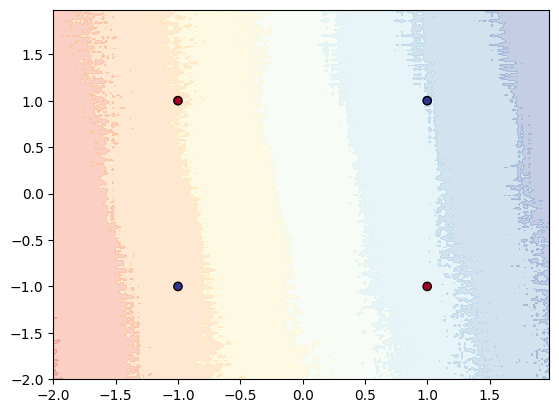

In [40]:
# XNOR Gate
X = torch.tensor([[-1, -1], [-1, 1], [1, -1], [1, 1]], dtype=torch.float, requires_grad=False)
Y = torch.tensor([1, -1, -1, 1], dtype=torch.float, requires_grad=False)

# Define the neural network without activation function
class NetNoActivation(nn.Module):
    def __init__(self):
        super(NetNoActivation, self).__init__()
        self.fc1 = nn.Linear(2, 4)  # More neurons for non-linearity (but we remove activation)
        self.fc2 = nn.Linear(4, 1)

    def forward(self, x):
        x = self.fc1(x)  # No activation function
        x = self.fc2(x)  # No activation function
        return x

# Initialize model, loss, and optimizer
model = NetNoActivation()
loss_func = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 5000
for i in range(epochs):
    optimizer.zero_grad()
    y_hat = model(X).squeeze()  # Forward pass
    loss = loss_func(y_hat, Y)  # Compute loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    if i % 500 == 0:
        print(f"Epoch {i}, Loss: {loss.item()}")

# Testing the model
for data in X:
    output = model(data)
    print(data, np.round(output.item()))

# Plot decision boundary
def plot_decision_regions(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x_min, x_max, 0.02),
                           np.arange(y_min, y_max, 0.02))

    inp = torch.tensor(np.c_[xx1.ravel(), xx2.ravel()], dtype=torch.float)
    Z = model(inp).detach().numpy().reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
    plt.show()

plot_decision_regions(X.numpy(), Y.numpy(), model)

- Without activation functions, the MLP behaves like an SLP.

- As a result, the model will only learn linear decision boundaries. It will fail to handle non-linearly separable problems.

- AND, OR, NOR are correctly classified since they are linearly separable.

- XNOR, XOR will fail since the model cannot learn a non-linear decision boundary. This leads to misclassification.

**3b) Can you tell why particular activation function can be used in the model architecture?**

-The right activation function ensures stable training, better learning, and improved accuracy.
- It helps in controlling outputs. Functions like sigmoid (0 to 1) and tanh (-1 to 1) keep outputs within a useful range, helping with stable training.

- It prevents training problems. ReLU and Leaky ReLU avoid issues like vanishing gradients, making deep networks learn better.

- Moreover, it helps learn complex patterns. Non-linear functions (like ReLU, Swish) allow the model to detect patterns that a simple linear model cannot.

- Best for specific tasks. Softmax is great for multi-class classification, sigmoid for binary classification, and ReLU for deep learning efficiency.

**Q4) Find the importance of activation functions in an MLP other than introducing non linearity.**

- Without activation functions, an MLP acts like a single-layer perceptron, reducing its depth and limiting learning.

- Activations like ReLU prevent vanishing/exploding gradients, ensuring stable learning and better convergence. It allows deeper networks to train effectively.

- They help neurons focus on relevant patterns, improving learning efficiency and model performance.

- Functions like ReLU create sparse networks, improving efficiency and reducing overfitting.

**Q5) Are there other methods to introduce non linearity in MLP other than using activation functions ?**

- Yes, there are some methods in which we can introduce non linearity in MLP other than using activation functions.
- Polynomial features (like adding x^3, x^2) can introduce non-linearity by transforming the input space.

- Kernel methods (like in SVMs) or Fourier transforms map inputs to higher dimensions where linear models work better.

- Multiplicative interactions (like gated mechanisms in LSTMs) introduce non-linearity by learning dynamic weight relationships.

- Adaptive weighting (like Mixture of Experts) combines multiple models dynamically, making the network behave non-linearly.

# References and useful resources



1.   http://d2l.ai/chapter_multilayer-perceptrons/mlp.html
2.   [But what is a neural network? (3 Blue 1 Brown series)](https://www.youtube.com/watch?v=aircAruvnK)

